In [170]:
# Importing Python standard libraries
import os, warnings, random
from shutil import copyfile
from random import randint, uniform
from IPython.display import clear_output

# Importing data handling libraries
import numpy as np
import pandas as pd
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

# Importing visualization libraries
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from PIL import Image

# Importing data splitting functions
from sklearn.model_selection import KFold, StratifiedKFold

# Importing Torch functions 
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torch.autograd import Variable
from torch.utils.data import Sampler, DataLoader, Dataset
from torchvision.utils import save_image

In [171]:
import cv2
import random

In [172]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

In [173]:
torch.__version__

'2.3.1+cpu'

In [174]:
torchvision.__version__

'0.18.1+cpu'

In [175]:

data_dir = '../data/osteoarthritis/auto_test/'
categories = ['train', 'test', 'val']

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

img_train = cv2.imread(train_dir, cv2.IMREAD_GRAYSCALE)
img_val = cv2.imread(val_dir, cv2.IMREAD_GRAYSCALE)
img_test = cv2.imread(test_dir, cv2.IMREAD_GRAYSCALE)



In [176]:
def get_classes(data_path, classes, data):
    print(f"---- {data} ----")
    knee_severity = {}
    count = 0

    for i in range(len(classes)):
        imgs = os.listdir(os.path.join(data_path, str(i)))
        knee_severity[i] = imgs
        count += len(imgs)

    for k, v in knee_severity.items():
        print(
            f"Grade {k} - {classes[k]}: {len(v)} images, {round((len(v) * 100) / count, 2)}%"
        )

    return knee_severity


def plot_classes(dict_classes, data_path, classes, data):
    for k, v in dict_classes.items():
        print(f"{data} - {classes[k]}")
        plt.figure(figsize=(10, 25))
        for i in range(5):
            img_path = os.path.join(data_path, str(k), v[i])
            img = tf.keras.preprocessing.image.load_img(img_path)
            plt.subplot(1, 5, 1 + i, xticks=[], yticks=[])
            plt.imshow(img)
            plt.title(f"Grade {k}")
        plt.show()

In [177]:
def show_images(path):
    labels  = list(os.listdir(path))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (15,6))
    random_indices = random.sample(range(1,101),10)
    
    for i, idx in enumerate(random_indices, 1):
        file_path = os.path.join(path, labels[idx])
        image = Image.open(file_path)
        subplot_row = (i-1) // 5
        subplot_col = (i-1) % 5
        axes[subplot_row, subplot_col].imshow(image)
        axes[subplot_row, subplot_col].axis('off')
    plt.tight_layout()
    plt.show()

In [178]:
show_images('../data/osteoarthritis/auto_test/2/')

In [179]:
show_images('../data/osteoarthritis/auto_test/3/')

In [180]:
def read_data(path,image_size,classes):
    X = []
    y = []
    gamma = 1.8
    labels = os.listdir(path)
    for label in labels:
        try:
            for image in os.listdir(path + '/' +label):
                img = cv2.imread(path + '/' +label + '/' + image)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img,(image_size, image_size))
                X.append(img)
                y.append(classes[label])
        except:
            pass
    return np.array(X), np.array(y)

In [181]:
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

In [182]:
base_dir = '../data/osteoarthritis/'
train_path = os.path.join(base_dir, 'train')
valid_path = os.path.join(base_dir, 'val')
test_path = os.path.join(base_dir, 'test')

In [183]:
train_data = get_classes(train_path, class_names, 'Train')
valid_data = get_classes(valid_path, class_names, 'Valid')
test_data = get_classes(test_path, class_names, 'Test')

---- Train ----
Grade 0 - Healthy: 2286 images, 39.56%
Grade 1 - Doubtful: 1046 images, 18.1%
Grade 2 - Minimal: 1516 images, 26.24%
Grade 3 - Moderate: 757 images, 13.1%
Grade 4 - Severe: 173 images, 2.99%
---- Valid ----
Grade 0 - Healthy: 328 images, 39.71%
Grade 1 - Doubtful: 153 images, 18.52%
Grade 2 - Minimal: 212 images, 25.67%
Grade 3 - Moderate: 106 images, 12.83%
Grade 4 - Severe: 27 images, 3.27%
---- Test ----
Grade 0 - Healthy: 639 images, 38.59%
Grade 1 - Doubtful: 296 images, 17.87%
Grade 2 - Minimal: 447 images, 26.99%
Grade 3 - Moderate: 223 images, 13.47%
Grade 4 - Severe: 51 images, 3.08%


Train data - Healthy


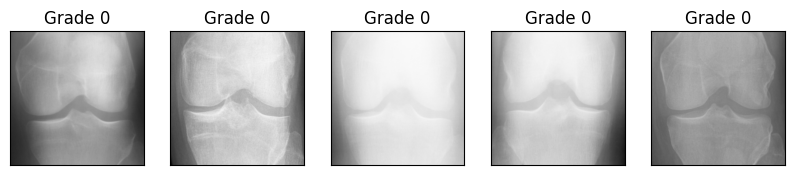

Train data - Doubtful


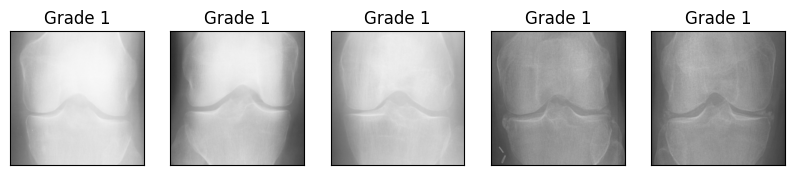

Train data - Minimal


Train data - Moderate


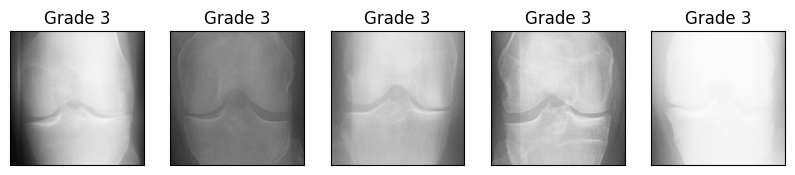

Train data - Severe


In [184]:
plot_classes(train_data, train_path, class_names, 'Train data')

Valid data - Healthy


Valid data - Doubtful


Valid data - Minimal


Valid data - Moderate


Valid data - Severe


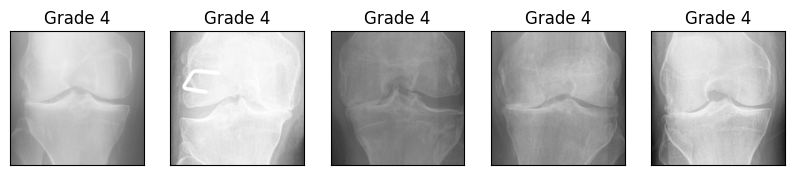

In [185]:
plot_classes(valid_data, valid_path, class_names, 'Valid data')

Test data - Healthy


Test data - Doubtful


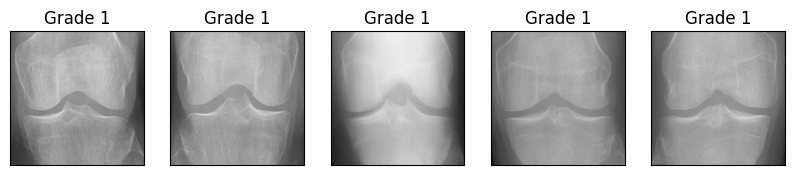

Test data - Minimal


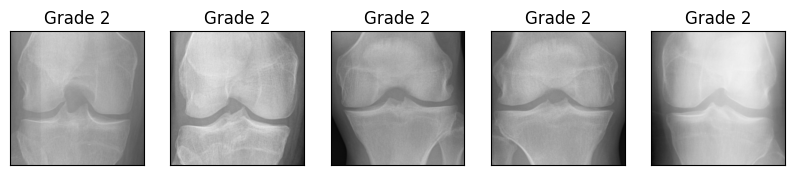

Test data - Moderate


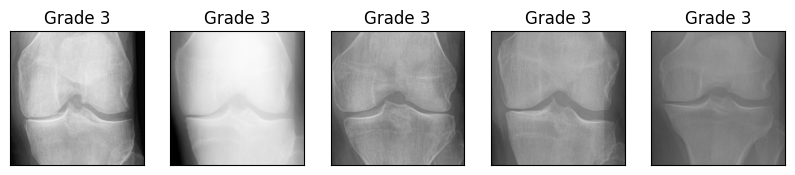

Test data - Severe


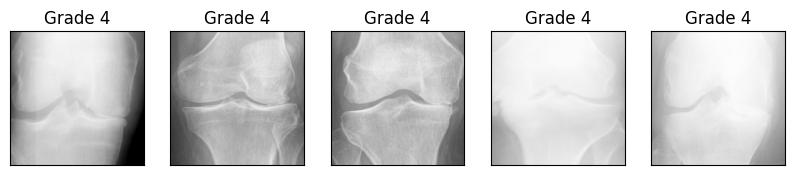

In [186]:
plot_classes(test_data, test_path, class_names, 'Test data')

Found 5778 images belonging to 5 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'next'

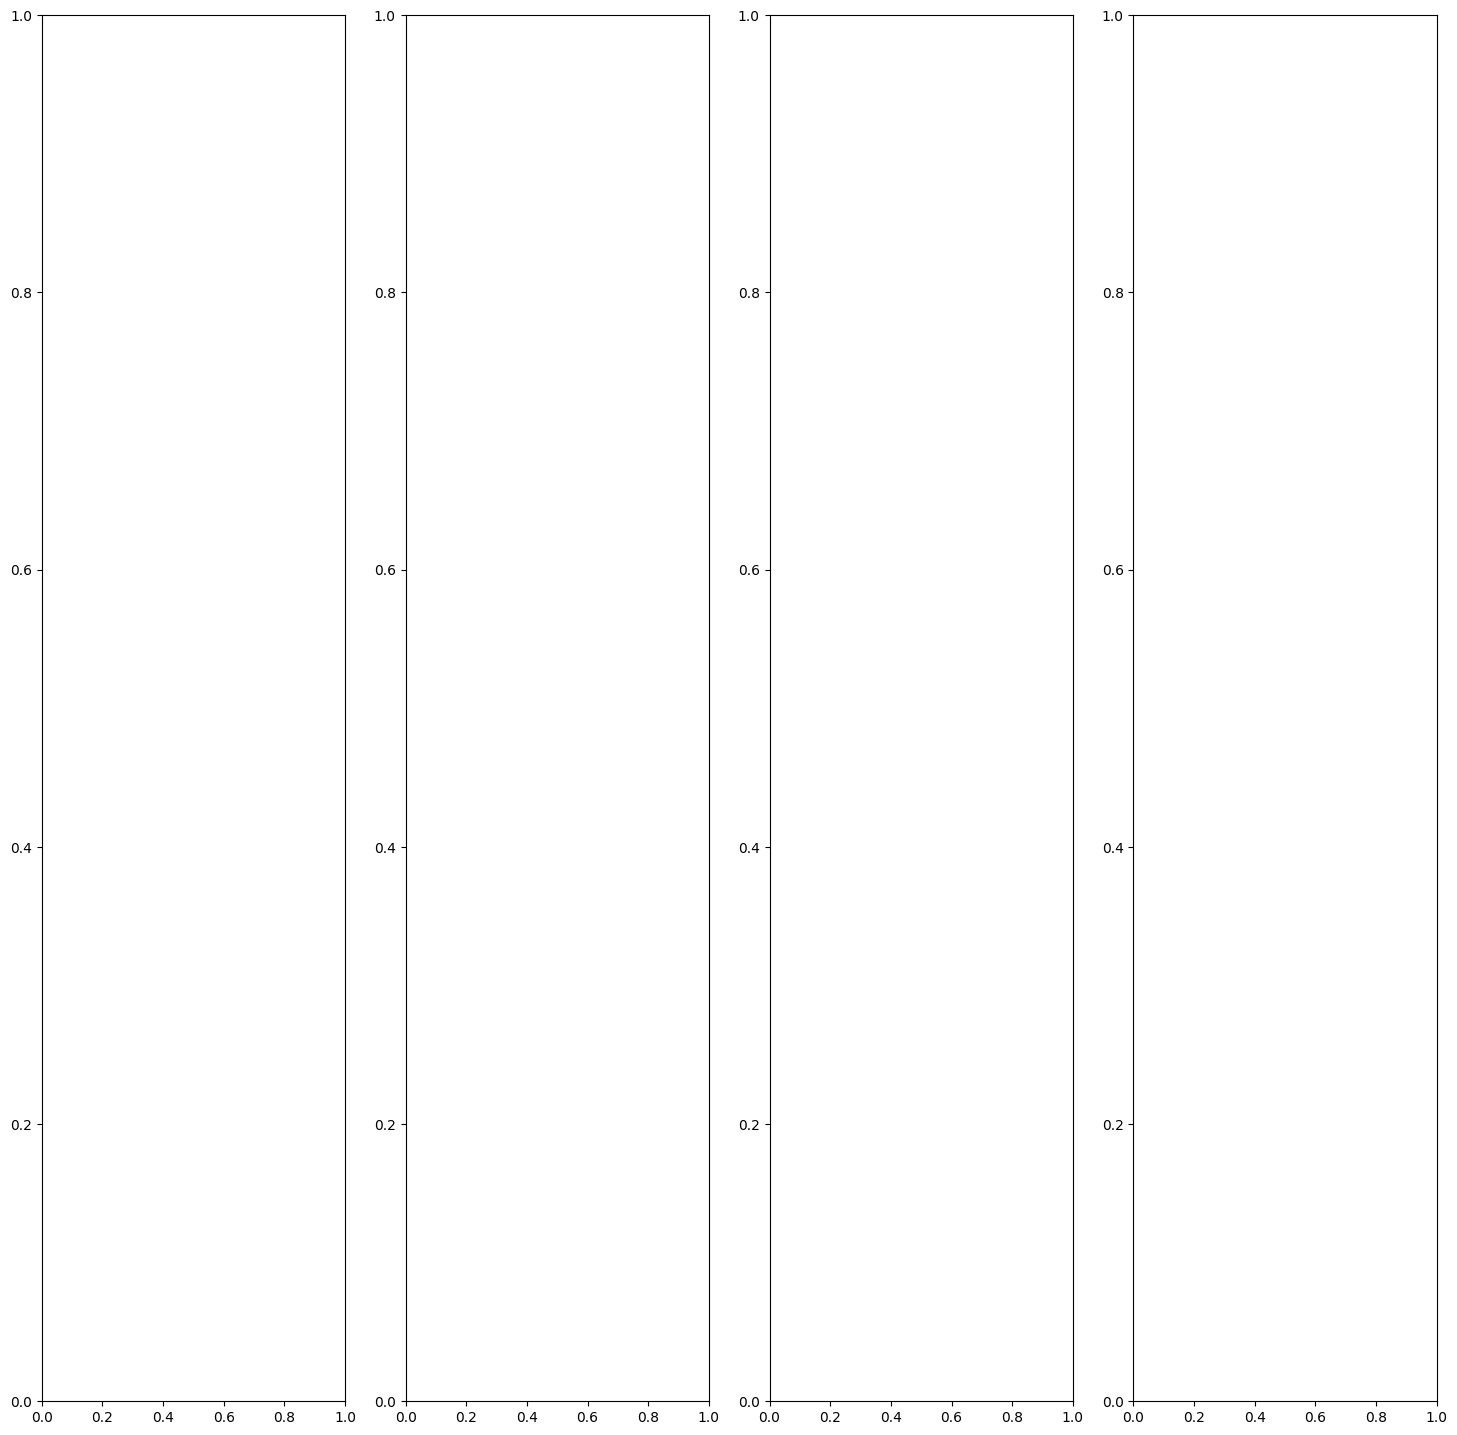

In [187]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=[0.3, 0.8]
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18, 18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype("uint8"))
plt.show()

In [ ]:
# 히스토, 리사이즈, 컨투어, 정규화처리

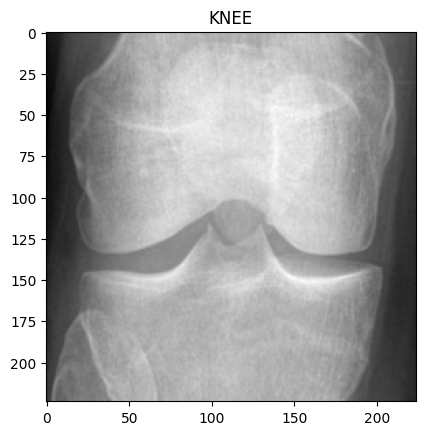

In [188]:
data_dir = '../data/osteoarthritis/test/0/'

img_name = os.listdir(data_dir)[41]
img_path = os.path.join(data_dir, img_name)
img_original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img_original, cmap='gray')
plt.title('KNEE')
plt.show()

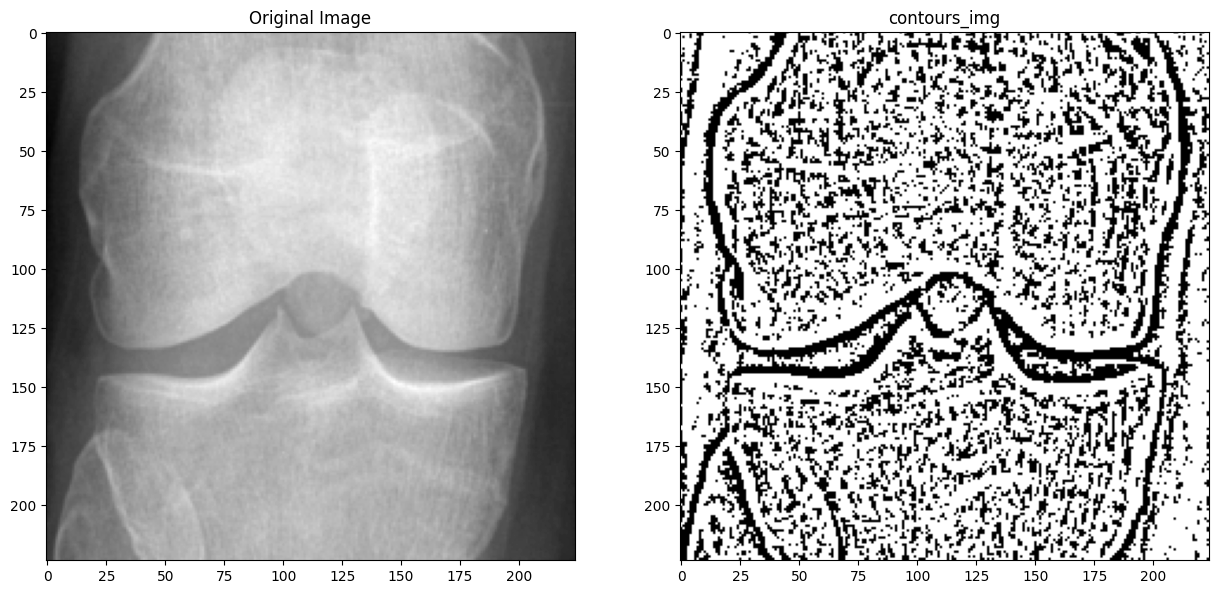

In [190]:
src = cv2.imread('../data/osteoarthritis/test/', cv2.IMREAD_GRAYSCALE)
ret, thresh = cv2.threshold(img_original, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
draw_img = cv2.drawContours(img_original.copy(), contours, -1, (0, 255, 0), 3)
draw_img = cv2.adaptiveThreshold(img_original,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(draw_img, cmap='gray')
plt.title('contours_img')
plt.show()